# Chirag Gohil

<h3>Linkedin :https://www.linkedin.com/in/chiraggohil28 </h3>

# Finding Heavy Traffic Indicators project EDA

In [1]:
from google.colab import files
uploded = files.upload()

Saving Metro_Interstate_Traffic_Volume.csv to Metro_Interstate_Traffic_Volume.csv


**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

***Load the Data & Overview of the Data ***

In [3]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


***Summary Statistics***

In [5]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


***Handle Missing Values***

In [6]:
print(df.isnull().sum())

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64


***Unique :***

In [7]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [8]:
df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [9]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

# ***Data Visualization***

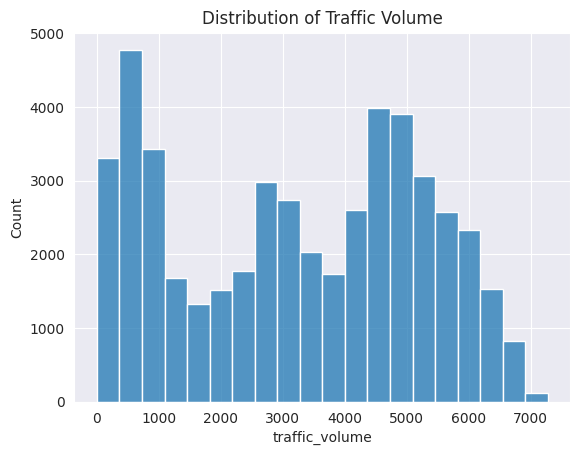

In [10]:
# Visualize distribution of traffic volume
sns.histplot(df['traffic_volume'], bins=20)
plt.title('Distribution of Traffic Volume')
plt.show()

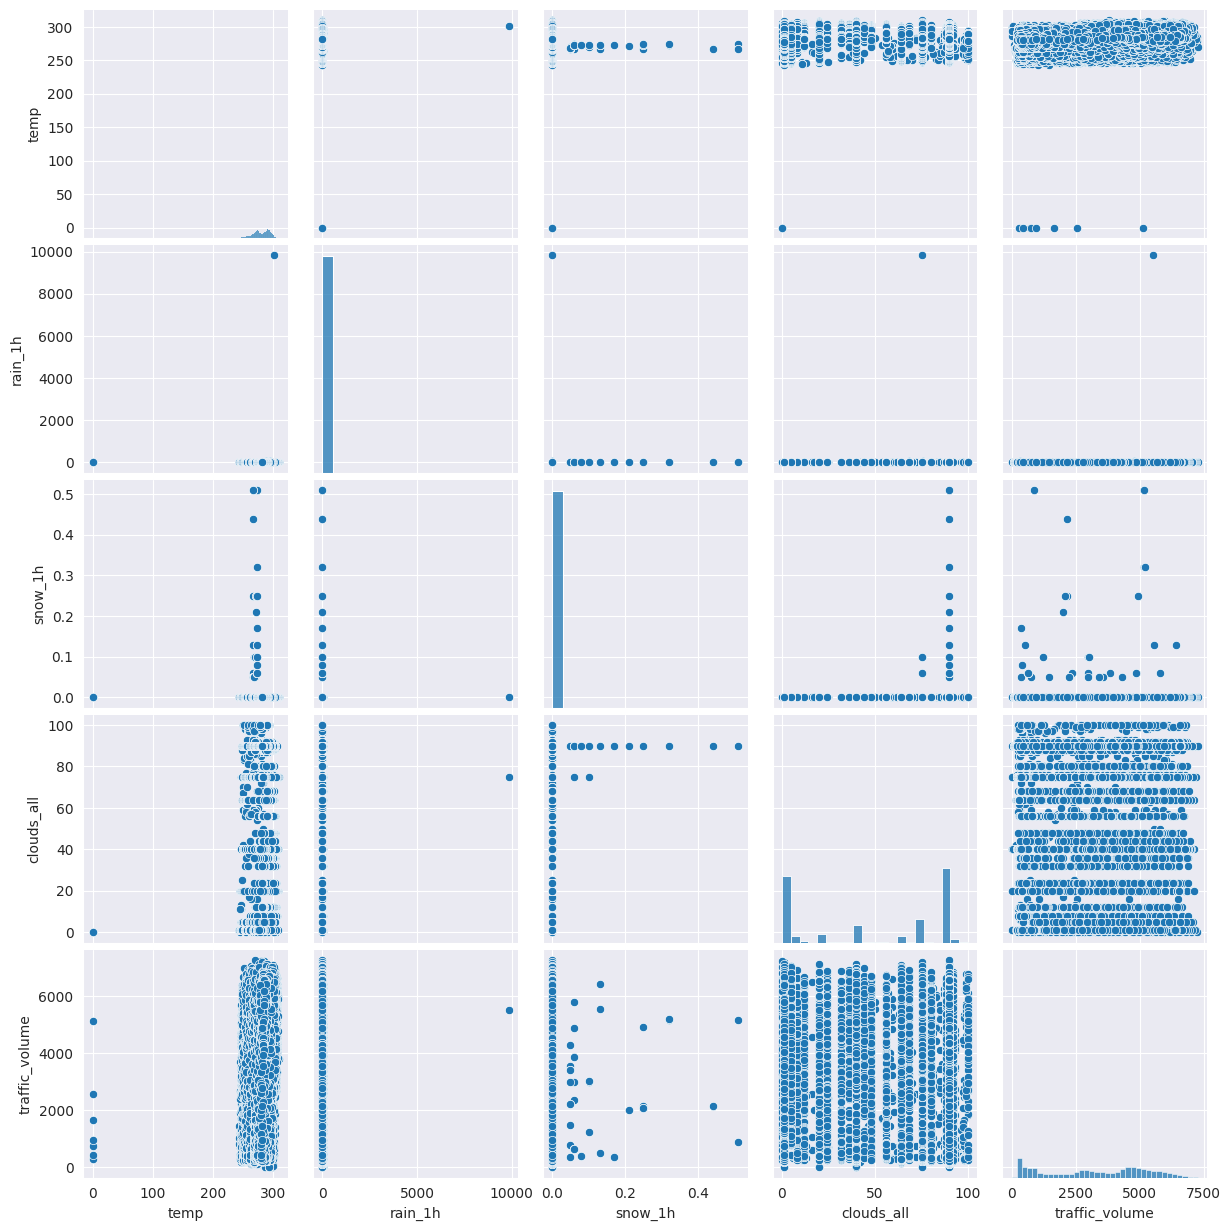

In [11]:
# Explore relationships between variables
sns.pairplot(df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']])
plt.show()

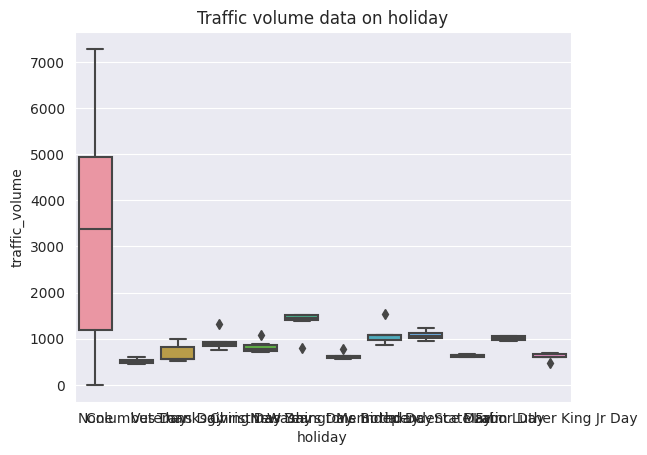

In [12]:
# Explore holiday impact on traffic volume
sns.boxplot(x='holiday',y='traffic_volume',data=df)
plt.title("Traffic volume data on holiday")
plt.show()

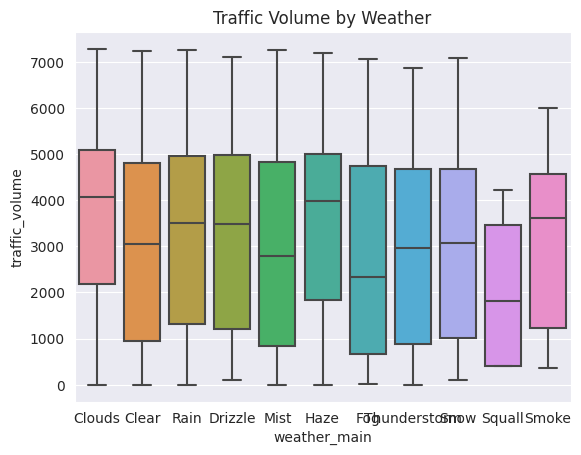

In [13]:
# Explore weather impact on traffic volume
sns.boxplot(x='weather_main', y='traffic_volume', data=df)
plt.title('Traffic Volume by Weather')
#plt.xticks(rotation=45)
plt.show()

## * Scatter plot for **rain and traffic volume** and **snow and traffic volume** *

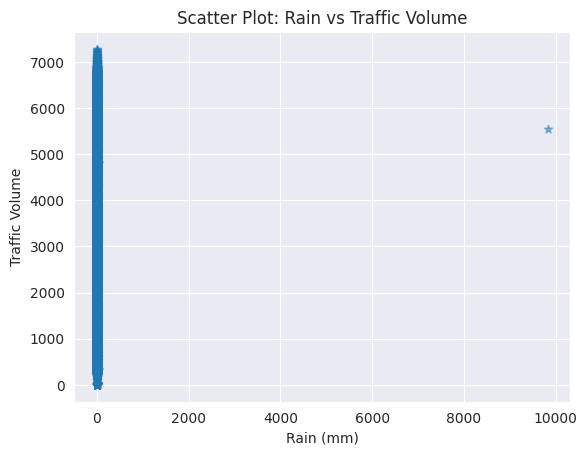

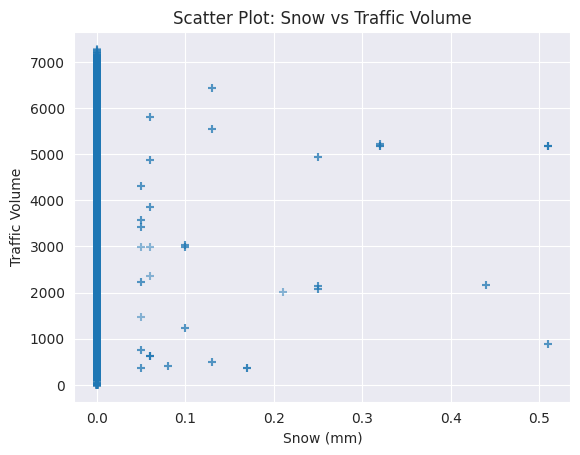

In [17]:
# Scatter plot for rain and traffic volume
plt.scatter(df['rain_1h'], df['traffic_volume'],marker='*',alpha=0.5)
plt.title('Scatter Plot: Rain vs Traffic Volume')
plt.xlabel('Rain (mm)')
plt.ylabel('Traffic Volume')
plt.show()

# Scatter plot for snow and traffic volume
plt.scatter(df['snow_1h'], df['traffic_volume'],marker='+',alpha=0.5)
plt.title('Scatter Plot: Snow vs Traffic Volume')
plt.xlabel('Snow (mm)')
plt.ylabel('Traffic Volume')
plt.show()


# ***Questions :***

In [18]:
# What is the average traffic volume?
df['traffic_volume'].mean()


3259.8183553232097

In [19]:
# How does temperature correlate with traffic volume?

df[['temp', 'traffic_volume']].corr()

,temp,traffic_volume
temp,1.000000,0.130299
traffic_volume,0.130299,1.000000


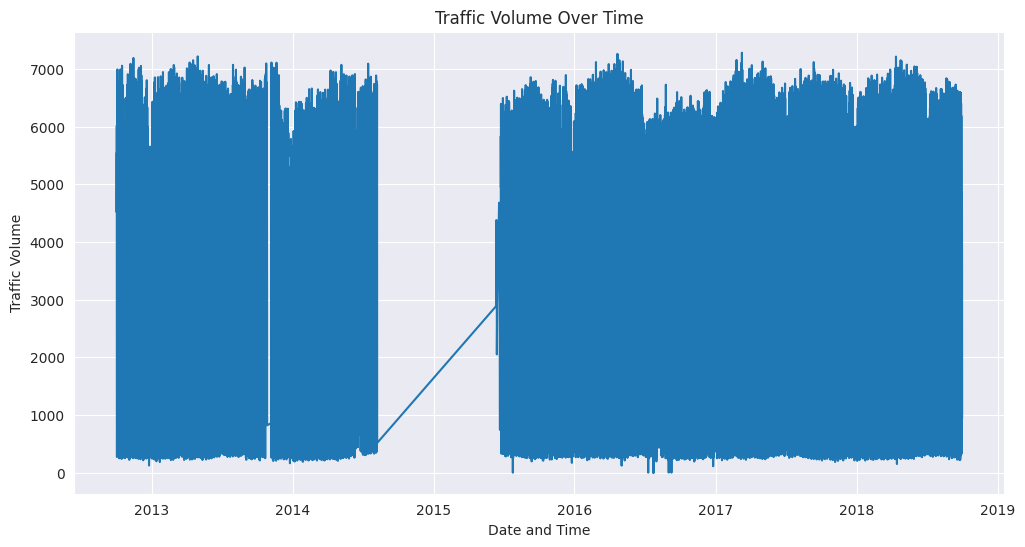

In [20]:
# Can you identify any trends or patterns in traffic volume over time?

df['date_time'] = pd.to_datetime(df['date_time'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='date_time', y='traffic_volume', data=df)
plt.title('Traffic Volume Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Traffic Volume')
plt.show()

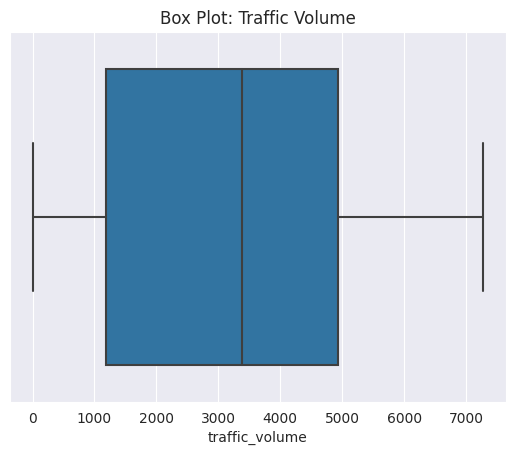

Number of Outliers: 0
Empty DataFrame
Columns: [holiday, temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description, date_time, traffic_volume]
Index: []


In [21]:
#  Are there any outliers in the data, and how might they impact the analysis?

from scipy import stats

# Create a box plot to visualize outliers
sns.boxplot(x=df['traffic_volume'])
plt.title('Box Plot: Traffic Volume')
plt.show()

# Identify outliers using Z-score
z_scores = np.abs(stats.zscore(df['traffic_volume']))
outliers = df[(z_scores >= 3) | (z_scores <= -3)]

# Print or analyze the outliers as needed
print(f'Number of Outliers: {len(outliers)}')
print(outliers)
